# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver

#### IMPORTANDO BIBLIOTECAS

In [1]:
import pandas as pd  
from tqdm import tqdm
import locale

#### IMPORTANDO BASE DE DADOS

In [2]:
funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep=';', decimal=',')
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')

#retirar colunas inutesi
funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis=1)
servicos_df = servicos_df.drop(['Unnamed: 4','Unnamed: 5'], axis=1)

display(funcionarios_df)

display(clientes_df)

display(servicos_df)


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


#### 1 - FOLHA SALARIAL

In [3]:
funcionarios_df['Custo Funcionario'] = funcionarios_df['Impostos'] + funcionarios_df['Salario Base'] + funcionarios_df['Beneficios']+ funcionarios_df['VT'] + funcionarios_df['VR']




locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
custo_funcionario = funcionarios_df['Custo Funcionario'].sum()
custo_funcionario = locale.currency(custo_funcionario, grouping=True)

print(f'o custo de todos os funcionarios é de {custo_funcionario}')

funcionarios_df.head()

o custo de todos os funcionarios é de R$ 2.717.493,22


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area,Custo Funcionario
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações,38208.04
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística,9915.36
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo,28195.32
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo,36962.66
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo,9568.36


#### 2 - FATURAMENTO DA EMPRESA

In [4]:
#clientes_df.info()
#servicos_df.info()

faturamentos_df = servicos_df[['ID Cliente','Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente','Valor Contrato Mensal']], on= 'ID Cliente')
faturamentos_df['Faturamento total'] = faturamentos_df['Tempo Total de Contrato (Meses)'] * faturamentos_df['Valor Contrato Mensal']

faturamento_total = faturamentos_df['Faturamento total'].sum()
faturamento_total = locale.currency(faturamento_total, grouping=True)

print(f'O faturamento total é de {faturamento_total}')

O faturamento total é de R$ 5.519.160,00


#### 3 - PORCENTAGEM DO FECHAMENTO DE CONTRATO POR FUNCIONARIOS

In [5]:
qtd_total_funcionarios = len(funcionarios_df['ID Funcionário'])

qtd_funcionarios_fecharamcontrato = len(servicos_df['ID Funcionário'].unique())

print(f'{qtd_funcionarios_fecharamcontrato / qtd_total_funcionarios:.2%}'  )

86.84%


#### 4 - TOTAL DE CONTRATOS FECHADOS POR AREA

,ID Funcionário,Area
0,67,Financeiro
1,67,Financeiro
2,67,Financeiro
3,67,Financeiro
4,17,Logística
...,...,...
232,25,Administrativo
233,79,Operações
234,99,Administrativo
235,14,Financeiro


Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64


<AxesSubplot:>

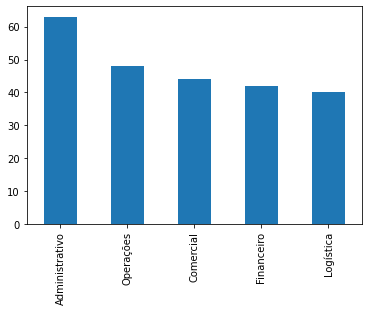

In [27]:
contratos_areas = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário','Area']], on= 'ID Funcionário')
display(contratos_areas)

qtd_contratos = contratos_areas['Area'].value_counts()
print(qtd_contratos)

qtd_contratos.plot(kind='bar')

#### 5. TOTAL DE FUNCIONARIOS POR AREA

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


<AxesSubplot:>

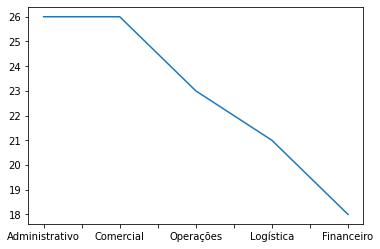

In [29]:
funcionarios_area = funcionarios_df['Area'].value_counts()
print(funcionarios_area)

funcionarios_area.plot()



## 6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?
 Dica:mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

In [32]:
#ticket_medio = clientes_df['Valor Contrato Mensal'].mean()
ticket_medio = locale.currency(clientes_df['Valor Contrato Mensal'].mean(), grouping=True)

print(f' O ticket médio é de {ticket_medio}')

 O ticket médio é de R$ 2.502,56
